In [1]:
import os
import sys
import time
import h5py
import pygrib

import numpy as np
import netCDF4 as nc
from glob import glob

from datetime import datetime, timedelta

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
year = 2021
GFS_dir = '/glade/campaign/collections/rda/data/ds084.1/{}/'.format(year)

In [5]:
base = datetime(year, 1, 1)
date_list = [base + timedelta(hours=h) for h in range(365*24)]

In [6]:
dt = date_list[0]

In [7]:
filename = datetime.strftime(dt, '/glade/campaign/collections/rda/data/ds084.1/%Y/%Y%m%d/gfs.0p25.%Y%m%d%H.f003.grib2')

In [8]:
# names = []

# with pygrib.open(filename) as grbio:
#     for i in range(1, 1200):
#         names.append(grbio[i])

In [9]:
# with pygrib.open(filename) as grbio:
#     precip1 = grbio[450].values

In [13]:
with pygrib.open(filename) as grbio:
    T = grbio[314+1].values #
    U = grbio[319+1].values
    V = grbio[320+1].values
    RH = grbio[315+1].values
    APCP = grbio[450+1].values
    CAPE = grbio[473+1].values
    PWAT = grbio[475+1].values

#     lat, lon = grbio[450+1].latlons()
# lon = lon-360

T_NA = T[:-360, 720:]
T_NA = np.flipud(np.concatenate((T_NA, T[:-360, 0][:, None]), axis=1))

U_NA = U[:-360, 720:]
U_NA = np.flipud(np.concatenate((U_NA, U[:-360, 0][:, None]), axis=1))

V_NA = V[:-360, 720:]
V_NA = np.flipud(np.concatenate((V_NA, V[:-360, 0][:, None]), axis=1))

RH_NA = RH[:-360, 720:]
RH_NA = np.flipud(np.concatenate((RH_NA, RH[:-360, 0][:, None]), axis=1))

APCP_NA = APCP[:-360, 720:]
APCP_NA = np.flipud(np.concatenate((APCP_NA, APCP[:-360, 0][:, None]), axis=1))

CAPE_NA = CAPE[:-360, 720:]
CAPE_NA = np.flipud(np.concatenate((CAPE_NA, CAPE[:-360, 0][:, None]), axis=1))

PWAT_NA = PWAT[:-360, 720:]
PWAT_NA = np.flipud(np.concatenate((PWAT_NA, PWAT[:-360, 0][:, None]), axis=1))

In [18]:
def norm_precip(x):
    return np.log(x+1)

def norm_rh(x):
    return 2*(x/100 - 0.5)

def norm_t(x):
    return (x-282.8)/16.2/2

def norm_u(x):
    return (x-0.74)/7.8/2

def norm_pwat(x):
    return (x-20.5)/16.3/2

def norm_cape(x):
    return (x-101.4)/328/2

In [11]:
with h5py.File(save_dir+'MRMS_ERA5_domain.hdf', 'r') as h5io:
    lon_ERA5 = h5io['lon_ERA5'][...]
    lat_ERA5 = h5io['lat_ERA5'][...]

In [21]:
np.std(CAPE_NA)

308.1838520047797

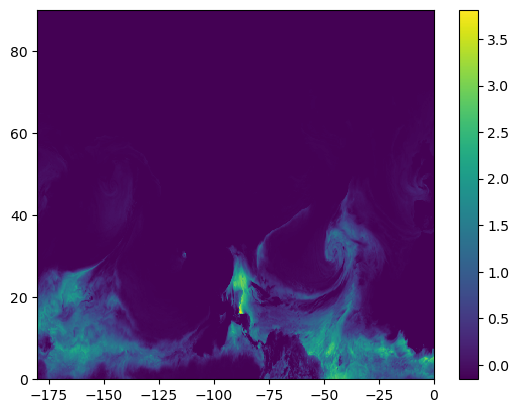

In [19]:
plt.pcolormesh(lon_ERA5, lat_ERA5, norm_cape(CAPE_NA))
plt.colorbar()

In [15]:
np.mean(PWAT_NA)

16.51393608022564

In [16]:
np.std(PWAT_NA)

15.360588302973518

In [88]:
lon[:-360, 720:].shape

(361, 720)

In [89]:
lat[:-360, 720:].shape

(361, 720)

In [90]:
lat_ERA5.shape

(361, 721)

In [29]:
names[449]

450:Total Precipitation:kg m**-2 (accum):regular_ll:surface:level 0:fcst time 0-3 hrs (accum):from 202101010000

In [26]:
names[450]

451:Total Precipitation:kg m**-2 (accum):regular_ll:surface:level 0:fcst time 0-3 hrs (accum):from 202101010000

In [32]:
names[314]

315:Temperature:K (instant):regular_ll:isobaricInhPa:level 80000 Pa:fcst time 3 hrs:from 202101010000

In [31]:
names[315]

316:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 80000 Pa:fcst time 3 hrs:from 202101010000

In [55]:
names[319]

320:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 80000 Pa:fcst time 3 hrs:from 202101010000

In [33]:
names[320]

321:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 80000 Pa:fcst time 3 hrs:from 202101010000

In [37]:
names[473]

474:Convective available potential energy:J kg**-1 (instant):regular_ll:surface:level 0:fcst time 3 hrs:from 202101010000

In [38]:
names[475]

476:Precipitable water:kg m**-2 (instant):regular_ll:atmosphereSingleLayer:level 0 considered as a single layer:fcst time 3 hrs:from 202101010000

In [10]:
sorted(glob(GFS_dir+'*/gfs*'))

['/glade/campaign/collections/rda/data/ds084.1/2021/20200101/gfs.0p25.2021010100.f003.grib2',
 '/glade/campaign/collections/rda/data/ds084.1/2021/20200101/gfs.0p25.2021010100.f006.grib2',
 '/glade/campaign/collections/rda/data/ds084.1/2021/20200101/gfs.0p25.2021010100.f009.grib2',
 '/glade/campaign/collections/rda/data/ds084.1/2021/20200101/gfs.0p25.2021010100.f012.grib2',
 '/glade/campaign/collections/rda/data/ds084.1/2021/20200101/gfs.0p25.2021010100.f015.grib2',
 '/glade/campaign/collections/rda/data/ds084.1/2021/20200101/gfs.0p25.2021010100.f018.grib2',
 '/glade/campaign/collections/rda/data/ds084.1/2021/20200101/gfs.0p25.2021010100.f021.grib2',
 '/glade/campaign/collections/rda/data/ds084.1/2021/20200101/gfs.0p25.2021010100.f024.grib2',
 '/glade/campaign/collections/rda/data/ds084.1/2021/20200101/gfs.0p25.2021010100.f027.grib2',
 '/glade/campaign/collections/rda/data/ds084.1/2021/20200101/gfs.0p25.2021010100.f030.grib2',
 '/glade/campaign/collections/rda/data/ds084.1/2021/20200101